In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 8863_idx5_x51_y1251_class0.png to 8863_idx5_x51_y1251_class0.png
Saving 8863_idx5_x101_y1201_class0.png to 8863_idx5_x101_y1201_class0.png
Saving 8863_idx5_x101_y1251_class0.png to 8863_idx5_x101_y1251_class0.png
Saving 8863_idx5_x101_y1301_class0.png to 8863_idx5_x101_y1301_class0.png
Saving 8863_idx5_x101_y1351_class0.png to 8863_idx5_x101_y1351_class0.png
Saving 8863_idx5_x151_y1151_class0.png to 8863_idx5_x151_y1151_class0.png
Saving 8863_idx5_x151_y1251_class0.png to 8863_idx5_x151_y1251_class0.png
Saving 8863_idx5_x151_y1301_class0.png to 8863_idx5_x151_y1301_class0.png
Saving 8863_idx5_x151_y1351_class0.png to 8863_idx5_x151_y1351_class0.png
Saving 8863_idx5_x151_y1401_class0.png to 8863_idx5_x151_y1401_class0.png
Saving 8863_idx5_x151_y1451_class0.png to 8863_idx5_x151_y1451_class0.png
Saving 8863_idx5_x201_y401_class0.png to 8863_idx5_x201_y401_class0.png
Saving 8863_idx5_x201_y1051_class0.png to 8863_idx5_x201_y1051_class0.png
Saving 8863_idx5_x201_y1201_class0.png to 

In [ ]:
import os
data = os.listdir('/content')

In [ ]:

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in data:
    if filename.endswith("class0.png"):
         class0.append(filename)
    elif filename.endswith("class1.png"):
        class1.append(filename)


In [ ]:
len(class0)

500

In [ ]:
len(class1)

500

In [ ]:
#import neccessary Libraries and modules
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

In [ ]:
class0_array = get_image_arrays(class0, 0)
class1_array = get_image_arrays(class1, 1)

In [ ]:
class0_array[1]

[array([[[121,  62, 128],
         [130,  81, 153],
         [105,  57, 124],
         ...,
         [128,  93, 173],
         [117,  83, 138],
         [118,  82, 126]],
 
        [[ 85,  38,  80],
         [138,  90, 151],
         [132,  85, 131],
         ...,
         [242, 239, 244],
         [242, 239, 243],
         [234, 225, 241]],
 
        [[151, 114, 186],
         [140,  98, 170],
         [129,  86, 146],
         ...,
         [229, 215, 224],
         [222, 210, 220],
         [210, 190, 211]],
 
        ...,
 
        [[150, 107, 183],
         [182, 150, 207],
         [189, 160, 217],
         ...,
         [127,  76, 148],
         [116,  66, 139],
         [137,  87, 157]],
 
        [[161, 117, 193],
         [161, 118, 190],
         [150, 106, 188],
         ...,
         [112,  63, 134],
         [106,  62, 140],
         [102,  59, 135]],
 
        [[159, 113, 178],
         [152, 111, 188],
         [141, 100, 178],
         ...,
         [117,  71, 152],
  

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

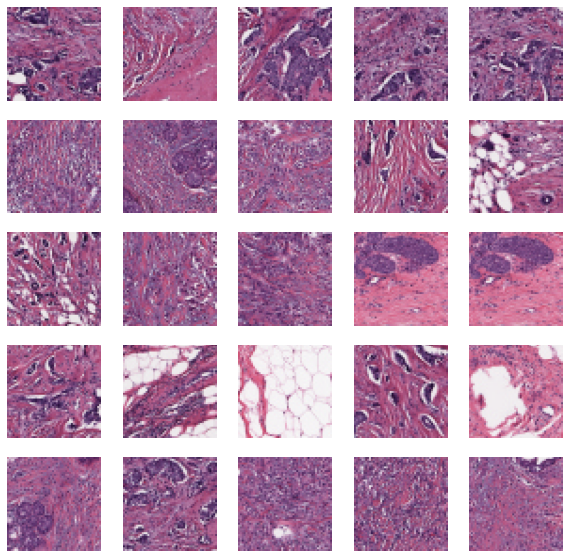

In [ ]:
show_img(data)

In [ ]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(42)
random.shuffle(combined_data)

In [ ]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1, 50, 50, 3)

In [ ]:
X.shape

(1000, 50, 50, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 50, 50, 3) (250, 50, 50, 3) (750, 2) (250, 2)


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [ ]:
epochs = 50  
batch_size = 250

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= epochs,
    verbose = 2,
    batch_size=batch_size
    )

Epoch 1/50
3/3 - 10s - loss: 14.8066 - accuracy: 0.6907 - val_loss: 9.2575 - val_accuracy: 0.8320 - 10s/epoch - 3s/step
Epoch 2/50
3/3 - 0s - loss: 10.7486 - accuracy: 0.8493 - val_loss: 3.9870 - val_accuracy: 0.8320 - 95ms/epoch - 32ms/step
Epoch 3/50
3/3 - 0s - loss: 5.5869 - accuracy: 0.8320 - val_loss: 0.8975 - val_accuracy: 0.8120 - 95ms/epoch - 32ms/step
Epoch 4/50
3/3 - 0s - loss: 3.8902 - accuracy: 0.7120 - val_loss: 1.7585 - val_accuracy: 0.7040 - 94ms/epoch - 31ms/step
Epoch 5/50
3/3 - 0s - loss: 2.2440 - accuracy: 0.7840 - val_loss: 0.6193 - val_accuracy: 0.8320 - 95ms/epoch - 32ms/step
Epoch 6/50
3/3 - 0s - loss: 1.8024 - accuracy: 0.8427 - val_loss: 0.6193 - val_accuracy: 0.8200 - 92ms/epoch - 31ms/step
Epoch 7/50
3/3 - 0s - loss: 1.3682 - accuracy: 0.8467 - val_loss: 0.5725 - val_accuracy: 0.8280 - 87ms/epoch - 29ms/step
Epoch 8/50
3/3 - 0s - loss: 1.0587 - accuracy: 0.8147 - val_loss: 0.6200 - val_accuracy: 0.8160 - 104ms/epoch - 35ms/step
Epoch 9/50
3/3 - 0s - loss: 0.8

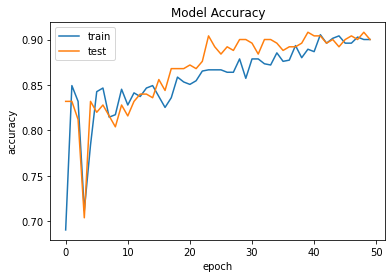

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

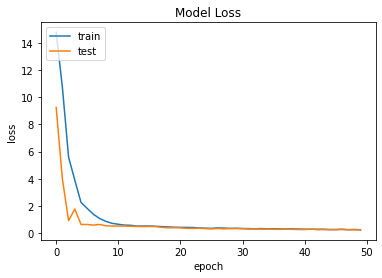

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 9ms/step - loss: 0.2172 - accuracy: 0.9000


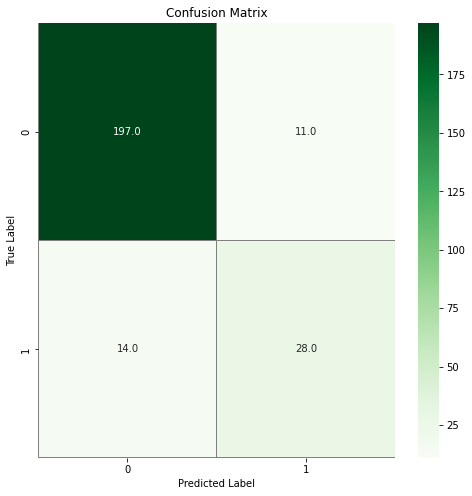

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       208
           1       0.72      0.67      0.69        42

    accuracy                           0.90       250
   macro avg       0.83      0.81      0.82       250
weighted avg       0.90      0.90      0.90       250



In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

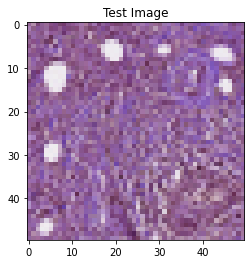

In [ ]:
index1 = 2
img_plot(X_test, index1)

In [ ]:
input1 = X_test[index1:index1+1]
print('Input Index =',index1)

Input Index = 2


In [ ]:
cnn_pred1 = model.predict(input1)[0].argmax()
label1 = y_test[index1].argmax()

In [ ]:
print('Predicted Value using  cnn model',cnn_pred1)
print("\nTrue Value",label1)

Predicted Value using  cnn model 0

True Value 0
